<a href="https://colab.research.google.com/github/KenMuriuki/Nairobi-Hospital-Model-Prediction/blob/master/Kennedy_Muriuki_Independent_Project_Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moringa School Independent Project Week 8

## Defining the question

### a) Specifying the question

In this weeks project, we are working with Nairobi Hospital. After conducting a clinical camp to test for hypothyroidism, the hospital has collected data on Thyroid patients and hopes to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Metric of success

The metric of success for this project is the model accuracy. The model accuracy shows how well a particular model predicts the dependent variable when tested after training it. The accuracy will be derived using the accuracy score. An accuracy that is low shows our model fails to accurately predict the dependent variable and the data may be underfit while an accuracy of 1 is not good either since the model is overfitted. In this project, my aim is to achieve an accuracy of at least 95%.

### c) Understanding the experimental design

The experimental design for this project is as follows:


*   Loading the libraries and dataset
*   Data cleaning and preparation
*   Performing the Univariate analysis
*   Performing the Bivariate analysis
*   Performing the Multivariate analysis
*   Applying the Decision tree algorithms
*   Applying the Support Vector algorithms
*   Making predictions using the different models that I've created
*   Assesing the accuracy of the models created
*   Making conclusions and challenging the solution




### d) Appropriateness of the data

The dataset provided has provided the data on the age and sex of the patients. It also highlights both the patients that suffer from Hypothyroidism and Hyperthyroidism and if the patient is on thyroxine medication or not. The target data also has 2 classes. Therefore the dataset looks appropriate to train the model on whether a patient is suffering from hypothyroid or not.

## Loading the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading the dataset

In [ ]:
# reading the csv file and checking the first few rows of the dataset
data = pd.read_csv('hypothyroid.csv', na_values='?')
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN
3162,negative,56.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.8,y,139.0,y,0.97,y,143.0,n,NaN


In [ ]:
# checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

On a simple overview of the data, I notice that there are 26 columns and 3163 entries. Most of the columns have object as the data type and this will need to be converted to category. Also I notice that there are columns with missing values.

## Dealing with missing values

In [ ]:
# checking for the missing values in our dataset
data.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [ ]:
# remove the TBG column since it contains almost entirely null values
data.drop(['TBG','TBG_measured'], axis=1, inplace=True)

# calculate the mean age of the column age 
age_mean = data['age'].mean()

# adding the mean age to the empty cells
data['age'].fillna(age_mean, inplace=True)

# replacing the mode of the sex to the null values
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

# replacing the missing values in TSH, T3, TT4, T4U, FTI with zero. This is because the patients who have missing values
# did not take the test. Therefore we will make the assumption that their test result was zero.
data.fillna(0, inplace=True)

# confirming there are no missing values
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

In [ ]:
# checking for duplicated values and unique values in the dataset
print(data.nunique())
print('\n*******************************************\n')
print(data.duplicated())

status                         2
age                           93
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
dtype: int64

*******************************************

0       False
1       False
2       False
3       False
4       False
        ...  
3158    False
3159    False
3160    False
3161    False
3162    F

There are no duplicated values in the dataset. Therefore I conclude that the data is consistent. After finding out the unique values in the dataset, I confirm that the categorical columns have two classes and therefore can be converted without compromising the data investigation process.

In [ ]:
# bunch the categorical and numerical columns together for easier analysis
cat_cols = ['status','sex','on_thyroxine',	'query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',
            'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',	'lithium',	'goitre',
            'TSH_measured', 'T3_measured', 'TT4_measured',	'T4U_measured',	'FTI_measured']

num_cols = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [ ]:
for col in cat_cols:
  data[col] = data[col].astype('category')
  
data.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
dtype: object

## Checking for outliers

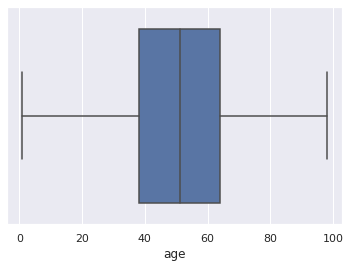

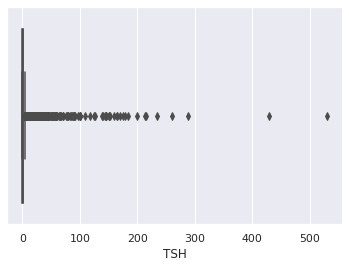

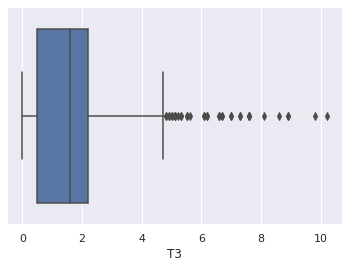

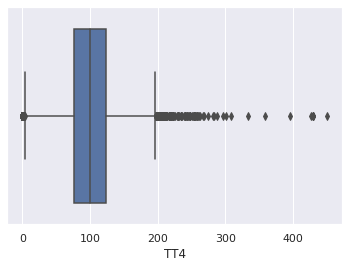

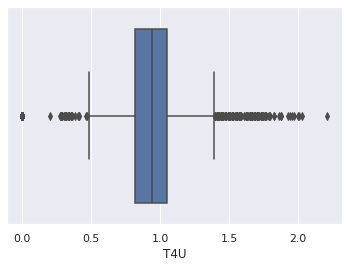

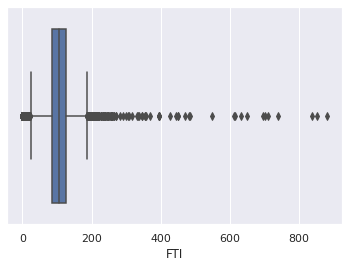

In [ ]:
# checking for outliers in the numerical columns
for col in num_cols:
  plt.figure()
  sns.boxplot(x=col, data=data)

After checking for outliers the following were observed:


1.   TSH measure had the highest outliers to the upper whisker with patients recording TSH measures of up to 500. The median of the TSH score was close to zero.
2.   Patients who attended the medical camp recorded a median T3 score of close to 2. There were outlier results to the upper whisker ranging from 5 and as high as 10.
3.   TT4 also has a lot of outliers to the upper whisker as high as close to 500 but the median TT4 score was 100.
4.   T4U recorded outliers to both sides of the whisker that were almost the same. FTI also recorded outliers to both sides but the ones towards the upper whisker were the most significant.



## Univariate Analysis

### Bar chart plots for categorical columns

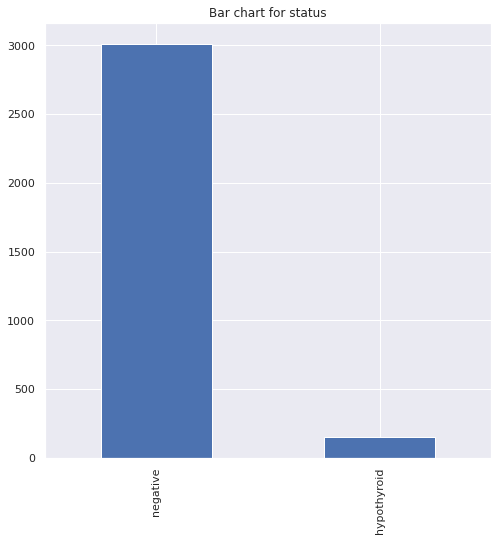

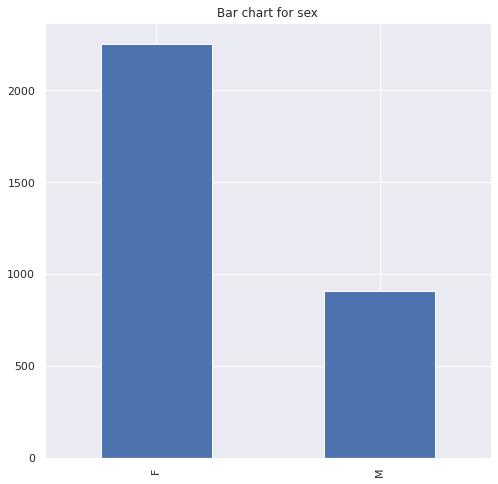

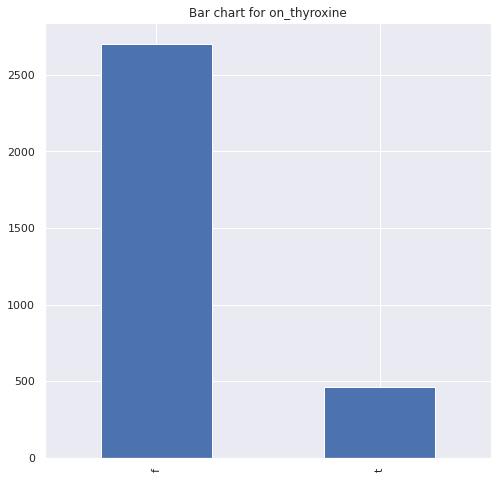

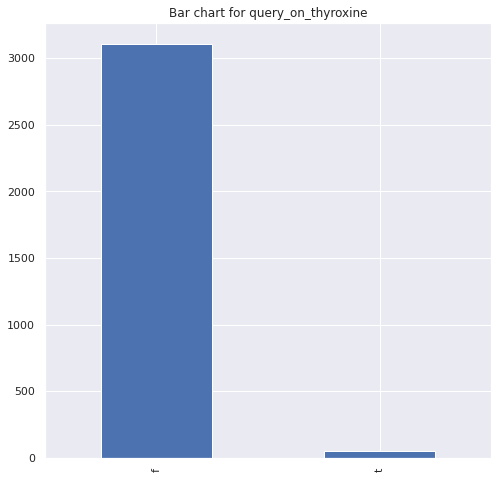

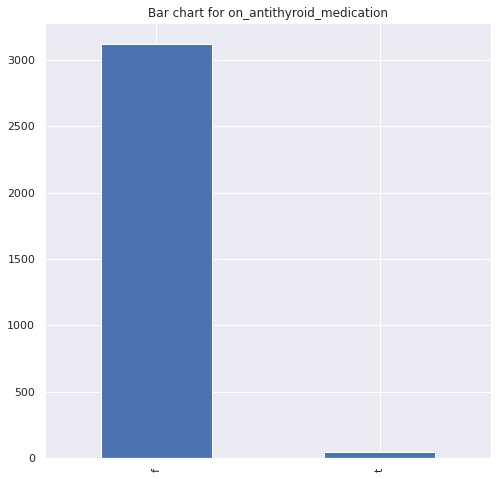

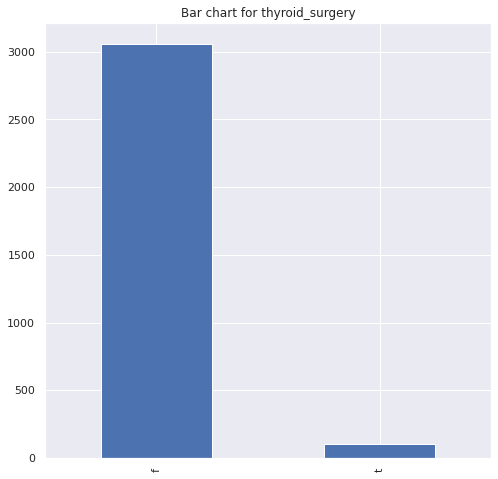

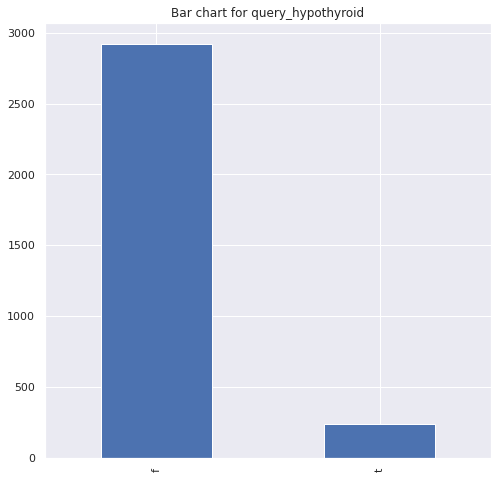

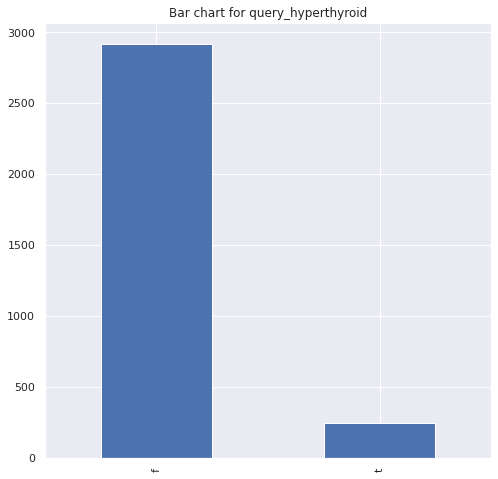

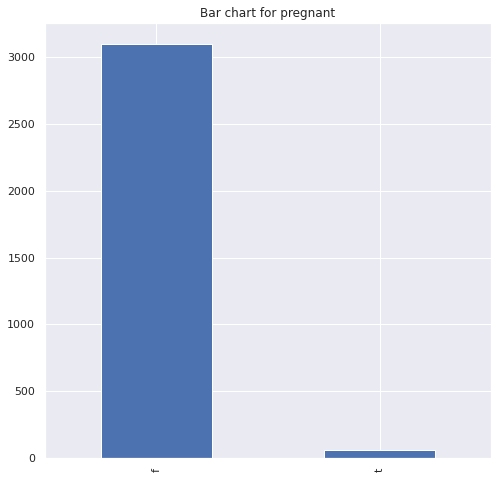

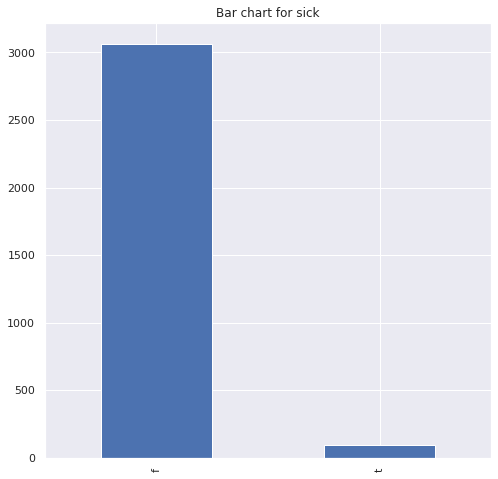

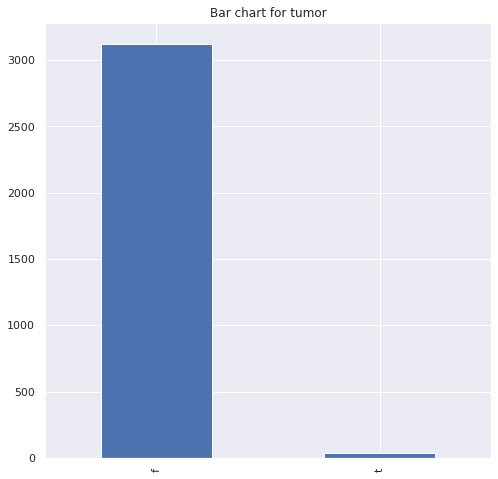

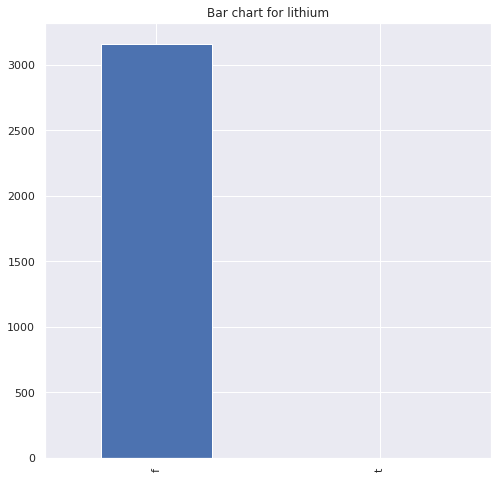

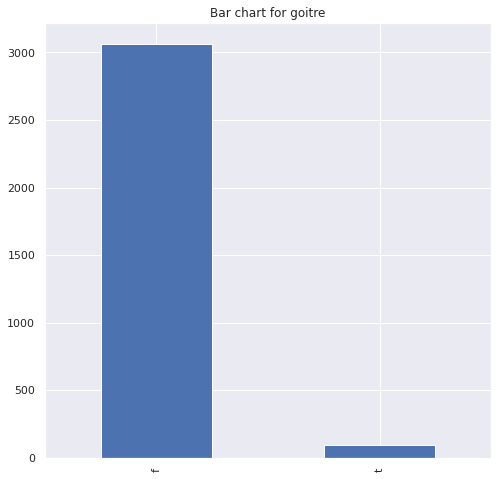

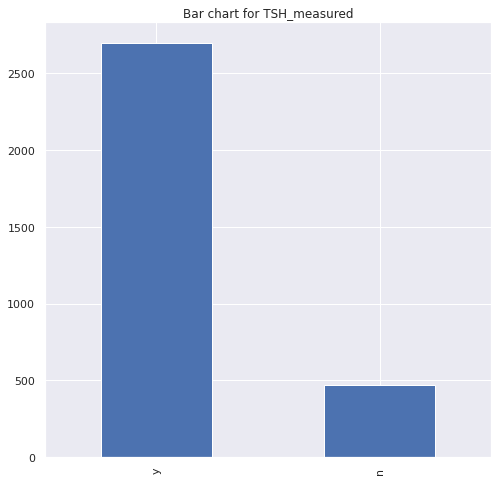

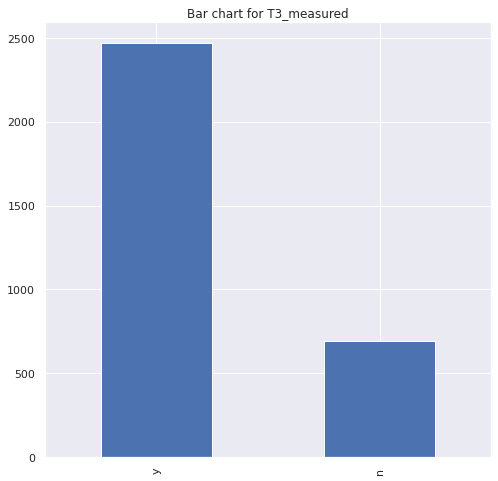

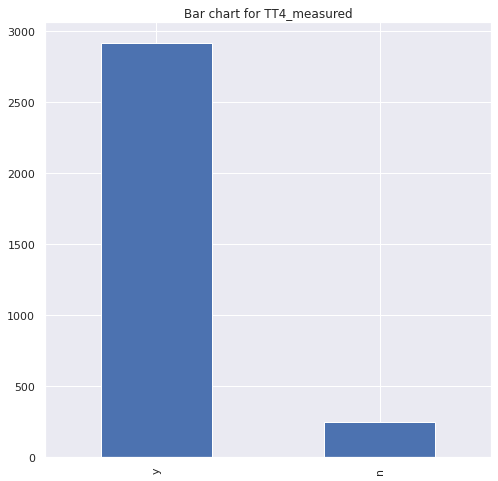

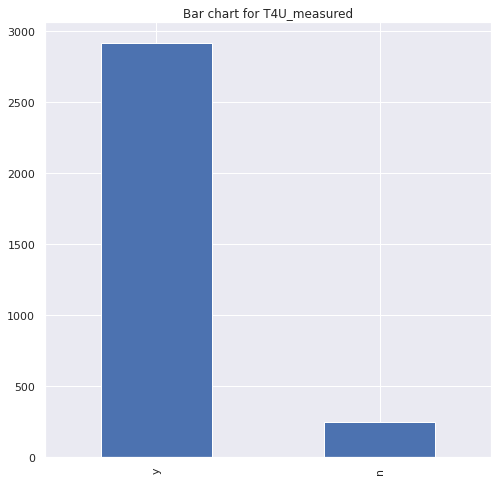

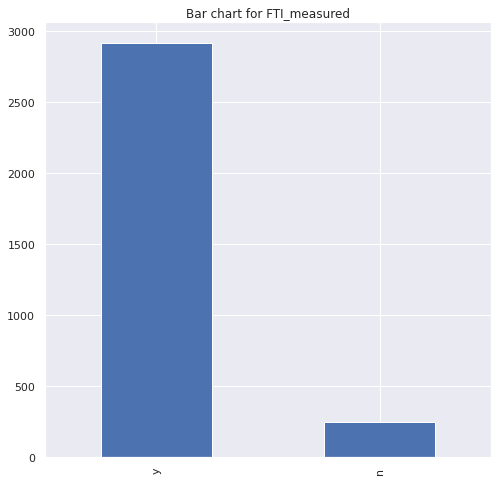

In [ ]:
# We create bar charts for the categorical columns showing the value counts of the classes in each column.

for col in cat_cols:

  fig = plt.figure(figsize=(8,8))

  ax = fig.gca()

  counts = data[col].value_counts()

  counts.plot.bar(ax=ax)

  ax.set_title('Bar chart for '+ col)



The bar chart reveals that a huge number of the patients tested negative for hypothyroid. Only a few number of patients actually tested positive for hypothyroid.
A significant number of patients in the dataset were female with only about less than half of the male patients as the female patients.
Other interesting findings is that there were no patients who used lithium at all, very few patients had goitre and most of the patients were neither sick or having a tumor.

### Distribution plots for numerical columns

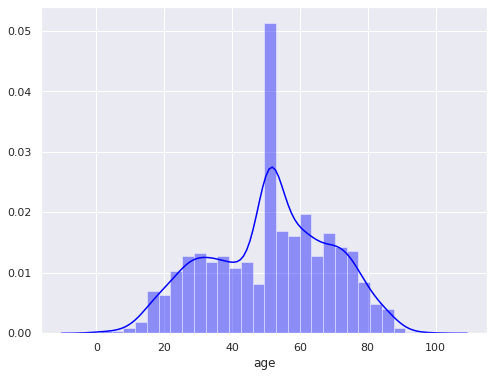

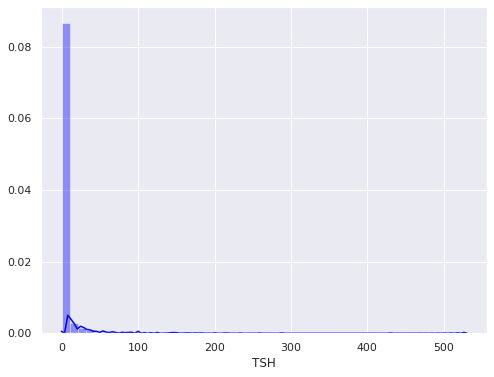

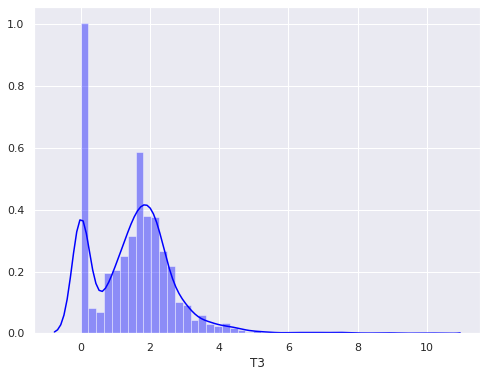

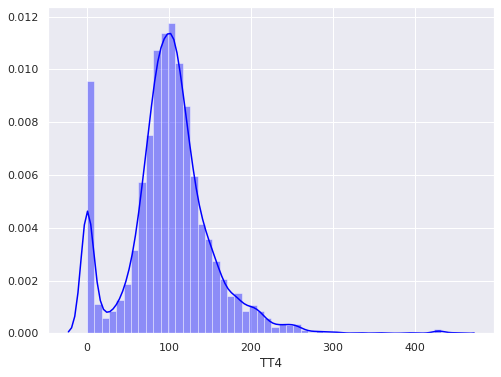

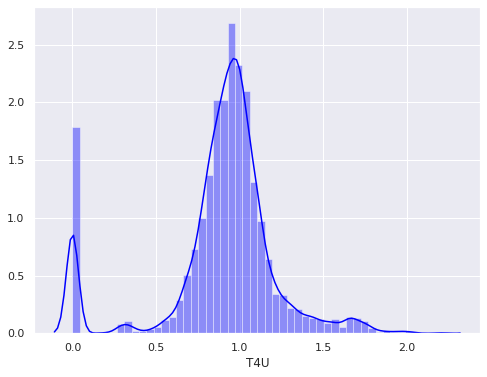

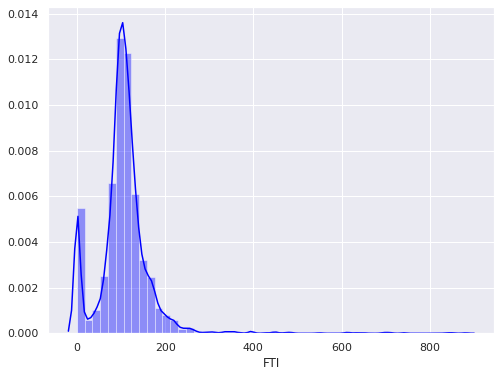

In [ ]:
# using a loop to plot the numerical columns
for col in num_cols:
  
    sns.set()

    plt.figure(figsize=(8,6))

    sns.distplot(data[col], color='blue')
    
    plt.show()

Age has a relatively bell shape and therefore looks like it follows a gaussian distribution. TSH is positively skewed and has only one mode. T3, TT4 and FTI are positively skewed and bimodal. T4U looks like it follows a normal distribution but has two modes.

## Bivariate analysis

### Scatter plots for the numerical columns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

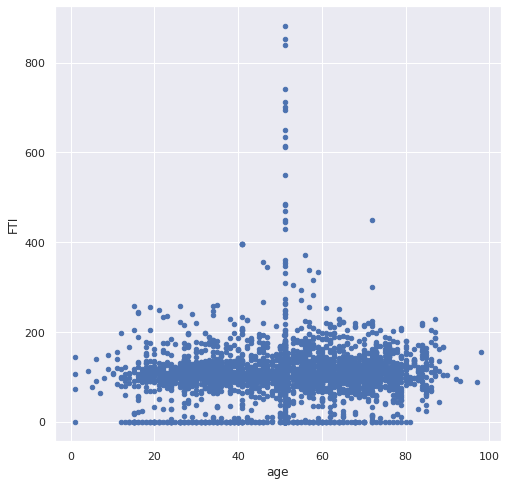

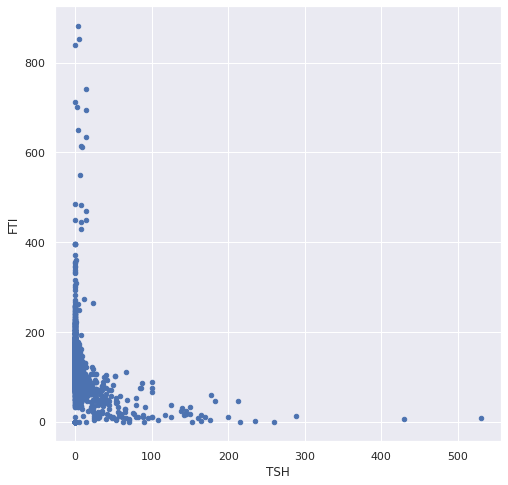

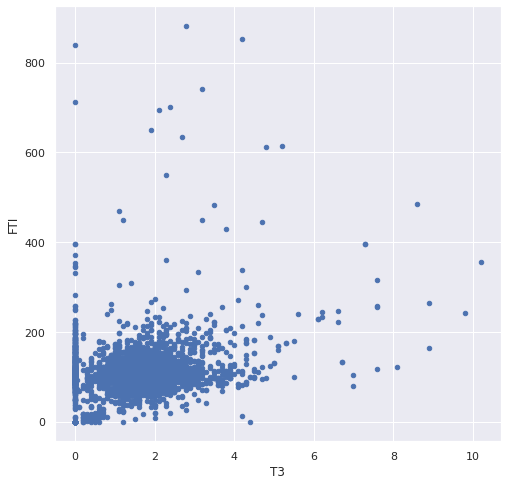

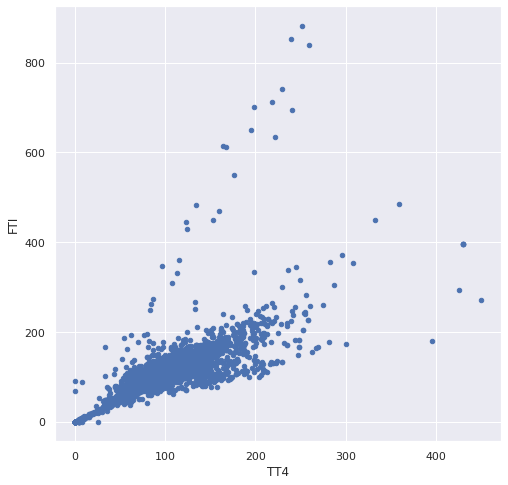

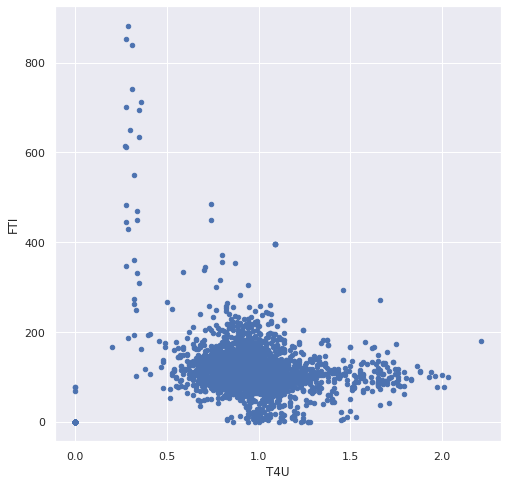

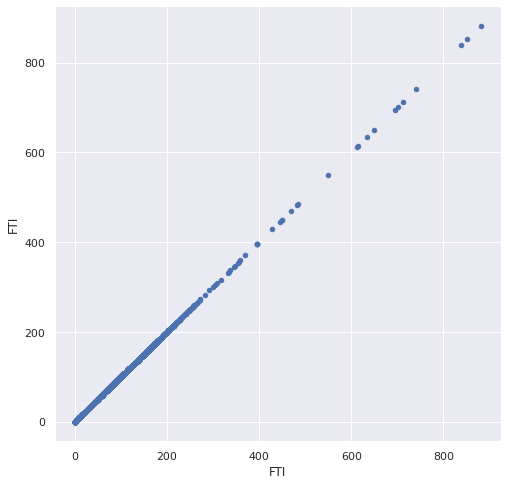

In [ ]:
# We plot scatter plots for the numerical columns in the dataset to identify the distribution of the data.
for col in num_cols:

  fig = plt.figure(figsize=(8,8))

  ax = fig.gca()

  data.plot.scatter(x=col, y = 'FTI', ax=ax)

In the bivariate scatter plots, I chose a random numerical variable FTI to use as a benchmark plot for all of the other numerical variables. T3 and TT4 have a cone shaped distribution when plotted against FTI.

## Encoding the categorical columns in the dataset

In [ ]:
# encoding the true / false columns 
t_f = ['on_thyroxine','query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',
       'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',	'lithium',	'goitre']

# looping through the columns to encode
for col in t_f:

  gen_enc = {col:{'f':0,'t':1}}

  data.replace(gen_enc, inplace=True)

  data[col] = data[col].astype(int)

# encoding the yes / no categorical columns
y_n = ['TSH_measured','T3_measured','TT4_measured','T4U_measured',
       'FTI_measured']

# looping through the columns to encode
for col in y_n:

  cat_enc = {col:{'y':0,'n':1}}

  data.replace(cat_enc, inplace=True)

  data[col].astype(int)

# encoding the sex column
sex_enc = {'sex':{'M':0,'F':1}}

data.replace(sex_enc, inplace=True)

data['sex'].astype(int)

# checking to see if the changes have been effected
data.head()



,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,hypothyroid,15.0,1,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0
2,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0
3,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0
4,hypothyroid,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0


In [ ]:
# export the clean file

data.to_csv('clean_hypothyroid')

In [3]:
# reading back the cleaned csv file.

df = pd.read_csv('clean_hypothyroid', index_col=0)

df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0
1,hypothyroid,15.0,1,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0
2,hypothyroid,24.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0
3,hypothyroid,24.0,1,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0
4,hypothyroid,77.0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0


## Decision Tree algorithms

### Baseline model 

In [13]:
# to create a baseline model, I will use a single decision tree to establish a benchmark for comparison with other decision tree algorithms
from sklearn.tree import DecisionTreeClassifier

# split the data into labels and features

y = np.where(df['status']=='hypothyroid',0,1)

test_features = df.columns.to_list()

test_features.remove('status')

x = df[test_features].values

# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit_transform(x)


# splitting into train an test sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

# setting the dicision tree classifier

clf = DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

# predicting using the model built

y_pred = clf.predict(x_test)

# comparing the actual and predicted

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.946288
std,0.198619,0.225628
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [14]:
# checking the accuracy of the model
print('The MSE of the random forest model is ',metrics.mean_squared_error(y_test, y_pred))

print('The RMSE of the random forest model is ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The accuracy of the random forest model is ',metrics.accuracy_score(y_test, y_pred))

The MSE of the random forest model is  0.022116903633491312
The RMSE of the random forest model is  0.14871752967788066
The accuracy of the random forest model is  0.9778830963665087


The single decision tree gives us a pretty impressive accuracy. Although the model may be overfit, this is the accuracy we aim to beat by introdicing random forests so as to randomise our selection and predict the model better.

### Random Forest Model

In [15]:
# split the data into labels and features
y = np.where(df['status']=='hypothyroid',0,1)

test_features = df.columns.to_list()

test_features.remove('status')

x = df[test_features].values

# splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

forest = RandomForestClassifier(n_estimators=100, min_samples_split=20, max_depth=5, random_state=0)

forest=forest.fit(x_train, y_train)

# predicting using the model
y_pred = forest.predict(x_test)

# comparing the actual and predicted
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.968404
std,0.198619,0.175059
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [16]:
# checking the accuracy of the model
print('The MSE of the random forest model is ',metrics.mean_squared_error(y_test, y_pred))

print('The RMSE of the random forest model is ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The accuracy of the random forest model is ',metrics.accuracy_score(y_test, y_pred))

The MSE of the random forest model is  0.022116903633491312
The RMSE of the random forest model is  0.14871752967788066
The accuracy of the random forest model is  0.9778830963665087


The accuracy of the random forest is the same as that of a single decision tree. However, we have recorded lower variances as compared to a single decision tree and since high variances are common to decision tree, our model seems to have improved a little bit.

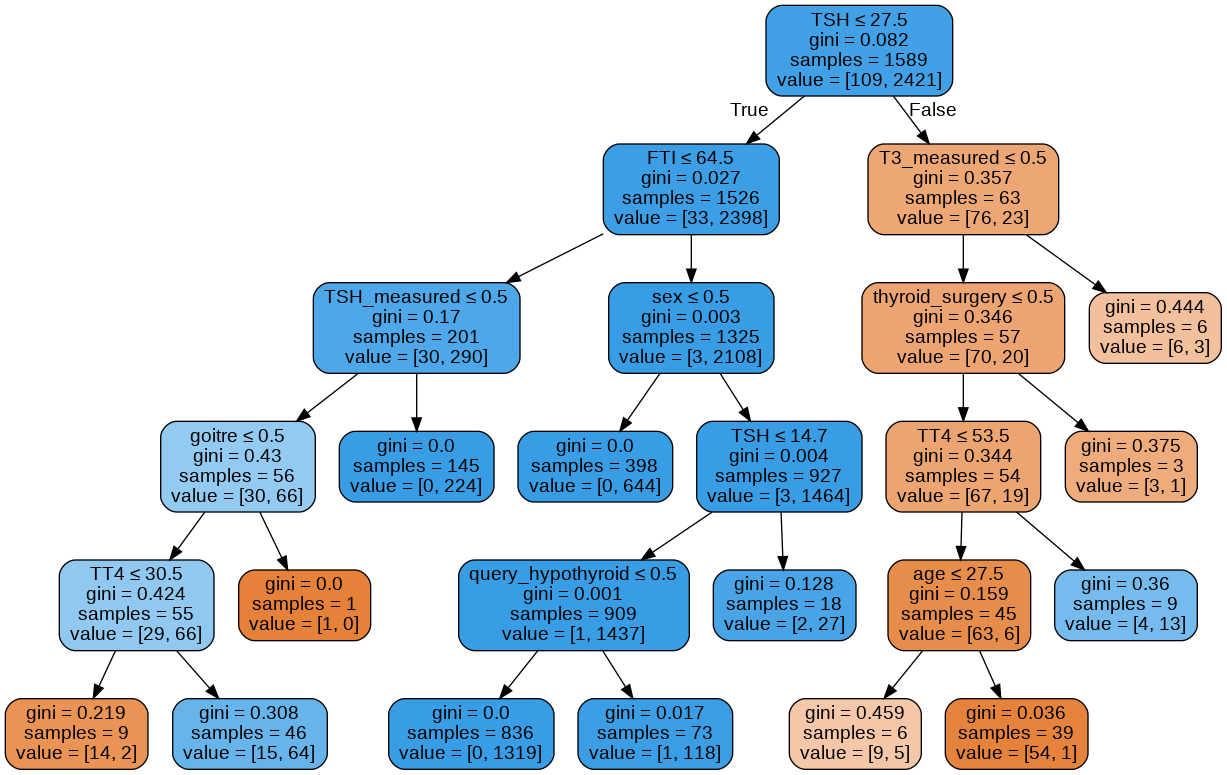

In [ ]:
# visualizing tree number 69 from the forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

tree = forest.estimators_[69]

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = test_features)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Hypothyroid_random_forest_69.png')

Image(graph.create_png())

This visual represents a decision tree number 69. We can see that from the root node we have the first feature as TSH. This means that it is the single most feature that varies the dependent variable the most in the random forest classification. It is denoted by having the smallest Gini score. The second variable is FTI that contains the second lowest Gini score. Therefore, as we move on to other algorithms, I expect to see FTI and TSH as 2 features that highly affect the decision as to whether a patient is diagnosed with Hypothyroid or not.

Visualizing the feature importance

In [ ]:
# get numerical feature importances 
importances = list(forest.estimators_[10].feature_importances_)

# list of tuples with variable and importance

feature_importances = [(feature, round(importance,2)) for feature, importance in zip(test_features, importances)]

print(feature_importances)
print()

# sort the values in ascending order

feature_importances = sorted(feature_importances, key=(lambda x: x[1]))

[print('variable: {:20}  importance: {}'.format(*pair)) for pair in feature_importances]

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.46), ('T3_measured', 0.0), ('T3', 0.07), ('TT4_measured', 0.0), ('TT4', 0.26), ('T4U_measured', 0.0), ('T4U', 0.02), ('FTI_measured', 0.0), ('FTI', 0.19)]

variable: age                   importance: 0.0
variable: sex                   importance: 0.0
variable: on_thyroxine          importance: 0.0
variable: query_on_thyroxine    importance: 0.0
variable: on_antithyroid_medication  importance: 0.0
variable: thyroid_surgery       importance: 0.0
variable: query_hypothyroid     importance: 0.0
variable: query_hyperthyroid    importance: 0.0
variable: pregnant              importance: 0.0
variable: sick                  importance: 0.0
variable: tumor                 importanc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

After generating the feature importances, I notice that the top three important features are TSH, TT4 and FTI. This shows that a patients thyroid condition can be assessed and determined by the results of their TSH, TT4 and FTI tests.

### Gradient boosted decision trees 

In [21]:
# splitting the data into features and labels 
y_gbc = np.where(df['status']=='hypothyroid',0,1)

x_gbc = df.drop(['status'], axis=1).values

# splitting the data into training and test sets
x_gbc_train, x_gbc_test, y_gbc_train, y_gbc_test = train_test_split(x_gbc, y_gbc, test_size=0.2, random_state=0)

# setting the number of trees that we want to predict
target_number_trees = 100

# setting the parameters for the classification boosting and fitting the model
gbc = GradientBoostingClassifier(learning_rate=1, n_estimators = target_number_trees, max_depth=5, min_samples_split=20, random_state=0)

gbc = gbc.fit(x_gbc_train, y_gbc_train)

# predicting the model
y_pred_gbc = gbc.predict(x)

# checking the accuracy of the model 
print('The mean accuracy score of the model is ', gbc.score(x, y))

The mean accuracy score of the model is  0.9971546000632311


To optimize the decision trees, I applied an ensemble boosting technique called Gradient boosting. To optimise the gradient boosted trees, I chose a learning rate of 1 which was found to be the optimum learning rate. The accuracy of the model greatly improved to around 99.7% from 97.7%. 

## Support Vector Machine Algorithms

In support vector machines, I will first create a base model using two predictor variables so as to get a comparing point with the rest of the SVM algorithms. These features are the ones that heavily influence the label attribute the most and will be obtained from the feature selection that is done above namely TSH and FTI. 

The features selected are TSH and FTI. Therefore I will build a first model to determine if a person has hypothyroid using the variable TSH and FTI.

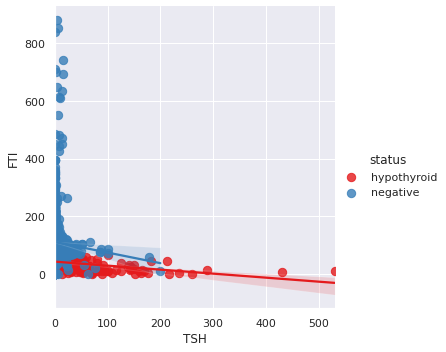

In [ ]:
# creating a visulaization of the variables TT4 and TSH

sns.lmplot('TSH','FTI', data=df, hue='status', palette='Set1', scatter_kws={'s':70});

### Fitting the model using a linear function

In [16]:
# split the data into x and y
x_svm = df[['TSH','FTI']].values

y_svm = np.where(df['status']=='hypothyroid',0,1)

# standardizing the data
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(x_svm)

# normalizing the data

x_svm = preprocessing.normalize(x_svm)

# splitting the data into training data and testing data. We will train using 80% of the data

x_svm_train, x_svm_test, y_svm_train, y_svm_test = train_test_split(x_svm, y_svm, test_size = 0.2, random_state = 0)

# fitting the model into the data

model = SVC(kernel='linear')
  
lin_model = model.fit(x_svm_train,y_svm_train)

# making prediction
y_svm_pred = model.predict(x_svm_test)

# checking the accuracy of the model
print('The accuracy of the linear model is ', accuracy_score(y_svm_test, y_svm_pred))

print(confusion_matrix(y_svm_test, y_svm_pred))


The accuracy of the linear model is  0.9715639810426541
[[ 15  11]
 [  7 600]]


Visualizing the model 

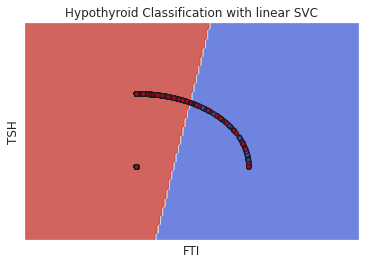

In [9]:
model = SVC(kernel='linear')
lin_model = model.fit(x_svm_train,y_svm_train)
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = lin_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = x_svm[:, 0], x_svm[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lin_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_svm, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('TSH')
ax.set_xlabel('FTI')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

The linear SVM shows a high accuracy of 97.15%. However, the confusion matrix shows us that the model misclassified 18 predictions. The visualization shows a linear separation of the plots however it does not look accurate. We apply the polynomial function to see if the model can better predict the values and if the accuracy can improve.

### Fitting the model using the polynomial function.

In [3]:
# fitting the model on to the data
x_poly = df[['TSH','FTI']].values

y_poly = np.where(df['status']=='hypothyroid',0,1)

# standardizing the data

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(x_poly)

# normalizing the data

x_svm = preprocessing.normalize(x_poly)

# splitting the data into train and test sets

x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(x_poly, y_poly, test_size=0.2, random_state=0)

# Building the model 

poly = SVC(kernel='poly',degree=3, gamma='scale')

# Training the model using the training set

poly.fit(x_poly_train, y_poly_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
# predicting the model

y_poly_pred = poly.predict(x_poly_test)

# cheking the accuracy of the model

print('The accuracy of the model is ',metrics.accuracy_score(y_poly_test, y_poly_pred))

print(confusion_matrix(y_poly_test, y_poly_pred))

The accuracy of the model is  0.9652448657187994
[[  7  19]
 [  3 604]]


Visualizing the polynomial model

In [ ]:
# Create a mesh grid for the graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, poly, xx, yy, **params):
    Z = poly.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = x_poly[:, 0], x_poly[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, poly, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y_poly, cmap=plt.cm.Paired, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

The polynomial kernel performs poorly in this case compared to the linear model. The accuracy of this model is 96.5% and has reduced as compared to that of the linear kernel. The model also misclassifies more values(22) than the linear kernel. Therefore, We try the gaussian kernel to see if the model can be improved from the linear kernel. I was not able to do the visualization as it was crashing the notebook each and every time i tried to run it.

### Fitting the model using the RBF function

In [4]:
# splitting the data into x and y values

m_rbf = df[['T4U','age']].values

n_rbf = np.where(df['status']=='hypothyroid',0,1)

# standardizing the data

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(m_rbf)

# normalizing the data

x_svm = preprocessing.normalize(m_rbf)

# splitting the data into train and test sets

m_rbf_train, m_rbf_test, n_rbf_train, n_rbf_test = train_test_split(m_rbf, n_rbf, test_size=0.2, random_state=0)

# contructing a model using the RBF function

rbf = SVC(kernel='rbf')

# training the model 

rbf.fit(m_rbf, n_rbf)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [5]:
# predicting using the rbf model

n_rbf_pred = rbf.predict(m_rbf_test)

# checking the accuracy of the model

print('The accuracy of the model is ',metrics.accuracy_score(n_rbf_test, n_rbf_pred))

print(confusion_matrix(n_rbf_test, n_rbf_pred))

The accuracy of the model is  0.9589257503949447
[[  0  26]
 [  0 607]]


Visualizing the model

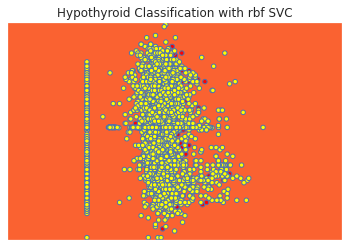

In [7]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with rbf SVC')
# Set-up grid for plotting.
m_rbf0, m_rbf1 = m_rbf[:, 0], m_rbf[:, 1]
xx, yy = make_meshgrid(m_rbf0, m_rbf1)

plot_contours(ax, rbf, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(m_rbf0, m_rbf1, c=n_rbf, cmap=plt.cm.autumn, s=20, edgecolors='b')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

The RBF model is clearly not an improvement. The predictions are way worse than both the linear and polynomial kernels. The model has an accuracy of 95.89%. 26 values have also been misclasified and therefore it is not a good fit for the model. The model was unable to separate the 2 classes as evident by the visualization above.

Therefore the best performing model is the linear model since it has a high accuracy. Therefore I will run the model again but this time using all of the feature variables.

### Final model using the SVM linear function

In [17]:
# split the data into x and y
x_svm = df.drop(['status'], axis=1).values

y_svm = np.where(df['status']=='hypothyroid',0,1)

# standardizing the data
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(x_svm)

# normalizing the data

x_svm = preprocessing.normalize(x_svm)

# splitting the data into training data and testing data. We will train using 80% of the data

x_svm_train, x_svm_test, y_svm_train, y_svm_test = train_test_split(x_svm, y_svm, test_size = 0.2, random_state = 0)

# fitting the model into the data

model = SVC(kernel='linear')
  
model.fit(x_svm_train,y_svm_train)

# making prediction
y_svm_pred = model.predict(x_svm_test)

# checking the accuracy of the model
print('The accuracy of the linear model is ', accuracy_score(y_svm_test, y_svm_pred))

print(confusion_matrix(y_svm_test, y_svm_pred))

The accuracy of the linear model is  0.9715639810426541
[[ 14  12]
 [  6 601]]


The model performs with a 97.15 % accuracy. This is the best model that I can build. However, there is a significant number of wrong values that are wrongly predicted and therefore a more accurate model could have been predicted.

### Challenging the solution

The models that I build managed to attain the metric of success. However, the linear model had the highest prediction accuracy. There are a few drawbacks. The model is unable to correctly predict all the results and has 18 wrongly predicted results. I tried to scale and normalize the data. This slightly improved the accuracy of the model. More data should be made available to improve the modelling accuracy and predict better results. Cross validation of the model would investigate if the kind of splits we are using produce the best results.